# PyTorch Tutorial

Author: Kellen Sullivan

This is an introductory tutorial for the deep learning library PyTorch. PyTorch gives professional developers the tools to create and train their own custom neural networks, and is the most commonly used deep learning framework in research and academia.

In this tutorial, you will be taught the fundamentals of PyTorch, through building your own neural network to classify hand-written digits. For this task, you will use the MNIST dataset, which is a collection of thousands of hand written digits with corresponding lables. Below is a sample of 4 hand-written digits from the dataset and their corresponding labels.


![MNISTDataSetExample](https://media.geeksforgeeks.org/wp-content/uploads/20240430155943/download-(39).png)



While you work through this tutorial and its exercises, its highly encouraged to check out the provided lecture videos created by math youtuber 3Blue1Brown. He explains the math behind the deep learning concepts this tutorial will breifly introduce, and his tutorials reference the exact same neural network that you will be building! His lessons are available to watch or read for free with the following link: [3Blue1Brown Neural Networks Lectures](https://www.3blue1brown.com/topics/neural-networks)





## Getting Started

To get started using PyTorch, you first have to install it! To do so, open a new terminal and run the following command:

- If you are on Windows/Mac: `pip3 install torch torchvision`
- If you are on Linux: `pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cpu`

Note that these commands will use your CPU as the compute platform. If you have an NVIDIA GPU, you can install PyTorch with CUDA as the compute platform to greatly speed up training. Check out the official installation guide to learn more: https://pytorch.org/get-started/locally/

You can confirm PyTorch was successfully installed by importing the package and printing out its version.

In [1]:
import torch

print(torch.__version__)

2.8.0+cpu


## Tensors

A tensor is an array or matrix like datastructure, similar to a NumPy array, but with extra capabalities that make it ideal for deep learning. Tensors may only contain numerical values, and are homogeneous meaning all elements in a tensor must be the same datatype.

### Initializing a Tensor

Pytorch provides many ways to intialize a new tensor. ADD HERE

In [2]:
import numpy as np


# from a python list
t1 = torch.tensor([1,2,3])

# from a numpy array
np_arr = np.array([[1,2], [3,4]])
t2 = torch.from_numpy(np_arr)

print(f"Tensor from python list:\n{t1}\n")
print(f"Tensor from numpy array:\n{t2}\n")

Tensor from python list:
tensor([1, 2, 3])

Tensor from numpy array:
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)



You can also initialize a tensor using an existing tensor. The new tensor will have the same shape and datatype as the existing tensor, unless explicitly overwritten.

In [3]:
# from an existing tensor
t3 = torch.ones_like(t2)
t4 = torch.zeros_like(t2)
t5 = torch.rand_like(t2, dtype=torch.float)

print(f"Tensor from t2 with all ones:\n{t3}\n")
print(f"Tensor from t2 with all zeros:\n{t4}\n")
print(f"Tensor from t2 with random values:\n{t5}")

Tensor from t2 with all ones:
tensor([[1, 1],
        [1, 1]], dtype=torch.int32)

Tensor from t2 with all zeros:
tensor([[0, 0],
        [0, 0]], dtype=torch.int32)

Tensor from t2 with random values:
tensor([[0.9887, 0.2929],
        [0.0285, 0.3708]])


Another common way to initialize a tensor is by providing the shape of the tensor.

In [4]:
t6 = torch.ones(2,2)
t7 = torch.zeros(2,3)

print(f"Tensor of all ones with dimensions 2x2:\n{t6}\n")
print(f"Tensor of all zeros with dimensions 2x3:\n{t7}")

Tensor of all ones with dimensions 2x2:
tensor([[1., 1.],
        [1., 1.]])

Tensor of all zeros with dimensions 2x3:
tensor([[0., 0., 0.],
        [0., 0., 0.]])


Although there are many more ways to initialize a tensor, in order to keep this tutorial brief we won't introduce any more here. If you are curious, you can read the following Tensor guide: [Tensor Creation](https://docs.pytorch.org/docs/stable/torch.html#creation-ops)

### Attributes

Tensors have built in attributes that quickly provide machine learning engineers useful information about the tensors they constructed. Tensor attributes can be accessed with the notation `tensor.attribute`. There are over 1000 tensor attributes that you can read about [here](https://docs.pytorch.org/docs/stable/torch.html), but in this tutorial we will cover the following:
- `dtype`
- `shape`
- `device`

`dtype` returns the torch datatype of a tensor

In [5]:
t = torch.ones(2,4,3)
print(t)
print(f"\nDatatype: {t.dtype}")

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

Datatype: torch.float32


`shape` returns the dimensions of the tensor

In [6]:
print(t.shape)

torch.Size([2, 4, 3])


`device` returns the location a tensor is stored.

By default, tensors are stored on the CPU. However, PyTorch provides the ability to store tensors on an accelerator, such as a GPU, to greatly improve performance. Accelerators are designed to optimize operations performed on tensors and can be 10-100x faster than when performed on the CPU.

In [7]:
print(t.device)

cpu



To check if you have an accelerator available, you can use the function `torch.accelerator.is_available()` which returns True or False. If an accelerator is availble, you can determine the devices name using `torch.accelerator.current_accelerator()`, and then move the tensor onto the accelerator using the function `to(accelerator_device_name)`.

In this tutorial we will not assume you have an accelerator available to use, but the below commented out code shows how to use a tensor on an accelerator if the option is available.

In [8]:
print(f"Accelerator is available: {torch.accelerator.is_available()}")

print(f"Device of available accelerator: {torch.accelerator.current_accelerator()}")

# Move an existing tensor onto an accelerator
# t = t.to(torch.accelerator.current_accelerator())

# Initialize a new tensor onto an accelerator using the optional device argument
# t1 = torch.tensor([1,2,3], device='cuda')

Accelerator is available: False
Device of available accelerator: None


### Operations

- indexing and slicing (say numpy like and don't go too in-depth)
- multiplying math (brief mention)
- item
- highlight softmax and argmax


## Handling Data

The first step in creating a neural network is loading the data. Thankfully, PyTorch provides many tools to make loading and iterating through data simple!

### Datasets

Torchvision is library often used alongside PyTorch to support computer vision tasks. It also contains built-in datasets that can be easily loaded in and used to train neural networks in PyTorch, including the MNIST dataset that we will be training a model on!

To load in the MSNIST dataset, we must first import the datasets submodule from torchvision. We also import ToTensor from the transforms submodule which will be used to transform the handwritten digit images into PyTorch Tensors.

In [9]:
from torchvision import datasets
from torchvision.transforms import ToTensor

Now, we can use the following code to load in MNIST dataset. PROBABLY WANT TO REORDER SOME OF THE MARKDOWN / MOVE SOME OF IT INTO COMMENTS

In [10]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

We load training data and testing data separately, that way we can train the model using the training data and then test it on never before seen data, to ensure the model is indeed learning how to classify digits and not just memorizing the training dataset. 

`training_data` is a set of 60,000 handwritten digit images with their corresponding labels (0-9)

`test_data` is a set of 10,000 handwritten digit images with their corresponding labels (0-9) DOUBLE CHECK THIS IS TRUE

Don't worry too much about the parameters for loading in data now, but briefly:
- `root` is the path where the train/test data is stored
- `train` specifies training or test dataset
- `download` if true, dowloads the data from the internet if it's not available at `root`.
- `transform` specify the feature and label transformations

We can look at the first image in the training data set using the following code: 

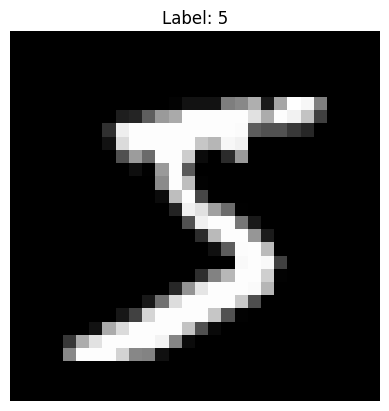

In [11]:
import matplotlib.pyplot as plt

img, label = training_data[0]
plt.imshow(img.squeeze(), cmap="gray") 
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

### DataLoader

When training and testing the model, we will repeatedly need to iterate through our datasets. In order to optimize the process, we would like to handle batching, shuffling the data, and loading it in parrallel. Thankfully, PyTorch provides DataLoaders to make this process easy.

The following code creates two DataLoaders, one for each dataset.

In [12]:
train_loader = torch.utils.data.DataLoader(
    training_data,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

Again don't worry too much about the parameters, but briefly: 
- `batch_size` is how many samples are loaded in each iteration
- `shuffle` is whether to randomly suffle the data
- `num_workers` is how many subprocesses to use for data loading (parrallelization)

MAY WANT TO MAKE BATCHSIZE BIGGER IF MODEL PERFORMANCE IS BAD

After creating a DataLoader, you can get a batch of samples by calling `next(iter(dataloader_name))`. MAYBE REWRITE THIS

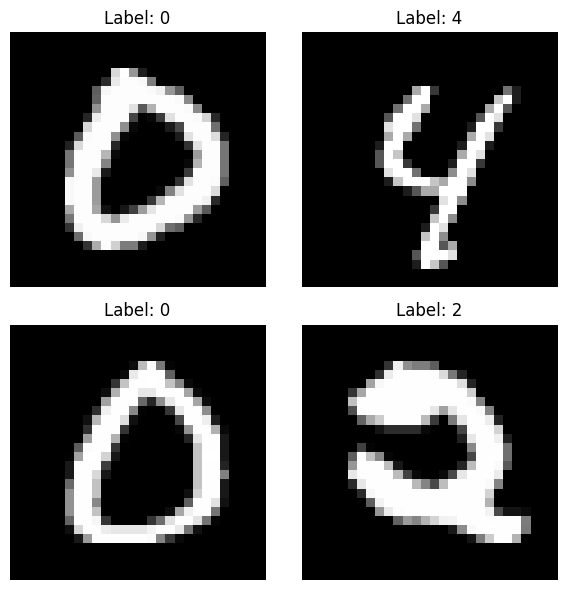

In [13]:
# Get one batch of training samples
train_features, train_labels = next(iter(train_loader))

# Plot all 4 images
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    img = train_features[i].squeeze() 
    label = train_labels[i].item()
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis("off")

plt.tight_layout()
plt.show()

## Constructing a Neural Network

The neural network that we are going to construct will have the following structure

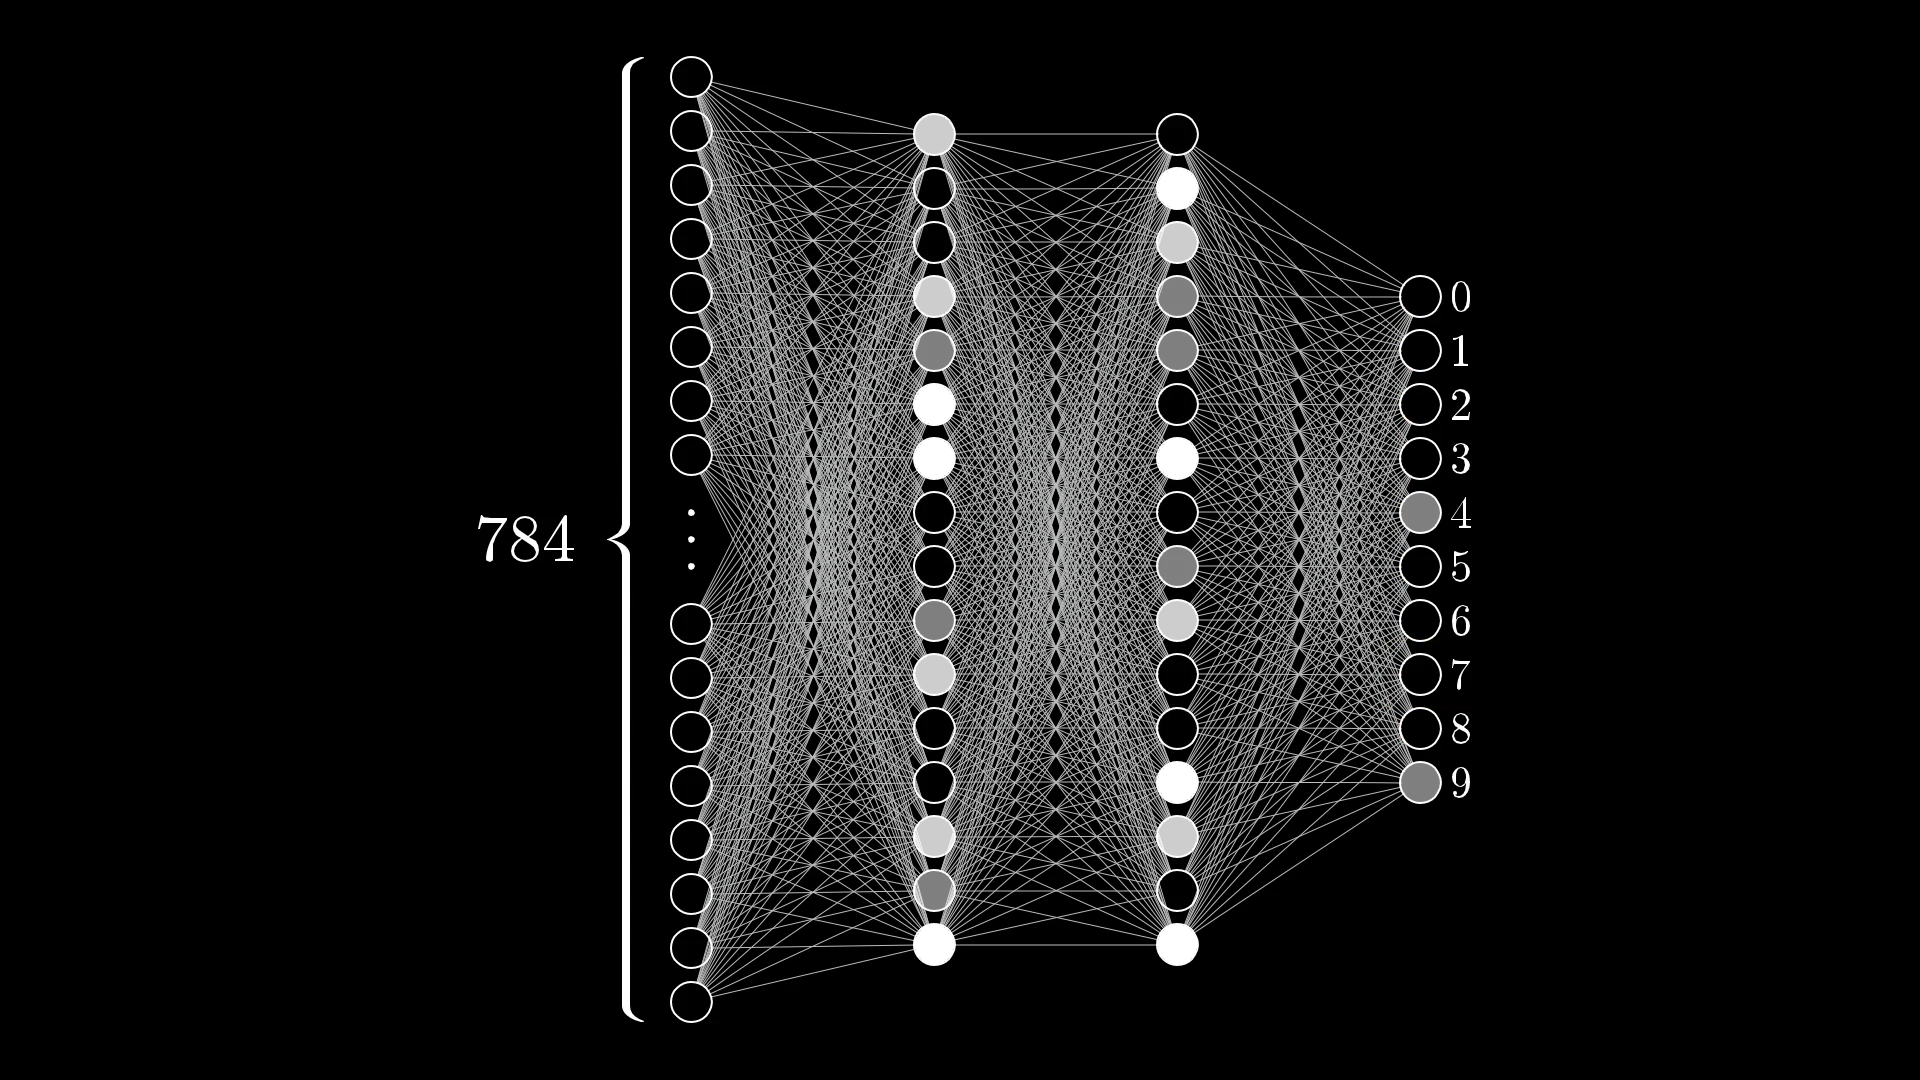

Note that the input layer has 28 * 28 = 784 neurons, one for each pixel in the images. The two middle layers are called "hidden layers" and have 16 neurons each. As 3Blue1Brown states, the amount of neurons in these hidden layers was chosen rather arbitrarily. Finally, the output layer has 10 neurons, one for each digit to predict (0-9)

### Modules

In order to build out the structured layers of our neural network, we will use a PyTorch concept called Modules. As the building blocks of neural networks in PyTorch, there are many different modules to try. In this tutorial, we will go over the following: 
- Linear
- Flatten
- ModuleList
- Sequential

PyTorch also allows you to define your own module, which we will go over at the end of this section. 


In [14]:
import torch.nn as nn

### Activation Functions

mention why they are important (one sentence plus link)
- sigmoid (squeeze between 0-1)
- ReLu (cut off at 0)

this tutorial will use sigmoid to follow 3Blue1Browns videos, but ReLu is not more widely used.

<img src="https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2017/neural-networks/sigmoid.png" width="500" height="250" alt="SigMoidPNG">
<img src="https://miro.medium.com/v2/resize:fit:3200/format:webp/1*w48zY6o9_5W9iesSsNabmQ.gif" width="500" height="250" alt="ReLu GIF">



PROBABLY NEED TO CHECK COPYWRITE OF THESE IMAGES/GIF IF I CAN USE THEM

In [15]:
a = torch.tensor(2)
b = torch.tensor((3,-1,7))

print(torch.sigmoid(a))
print(torch.sigmoid(b))

print(torch.relu(a))
print(torch.relu(b))

tensor(0.8808)
tensor([0.9526, 0.2689, 0.9991])
tensor(2)
tensor([3, 0, 7])


### Init and Forward Function

mention purpose of init and forward functions here

We define both the init and forward functions in a class.

In [16]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 16)  # input layer to hidden layer 1
        self.fc2 = nn.Linear(16, 16)     # hidden layer one to hidden layer 2
        self.fc3 = nn.Linear(16, 10)     # hidden layer 2 to output layer
    
    def forward(self, x):
        x = self.flatten(x)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x  
    
model = MNISTClassifier()

### PreBuilt PyTorch Models (Extra)

As a breif aside to this tutorial, PyTorch provides many prebuilt models that you can load in and use. In this example, we load in the resnet18 pretrained model and pass in the `weights=True` argument so the model is ready to classify digits. You can read about many different prebuilt models provided by PyTorch [here.](https://docs.pytorch.org/vision/0.9/models.html)

TBD FIX THIS to work for this given problem

In [25]:
import torchvision.models as models
resnet_model = models.resnet18()

## Loss Functions

Loss or Cost functions are used to evaluate how well your network is performing. A loss function takes the model's predicted values, and the correct or target values as input. The loss funtion then outputs some scalar value representing the loss of the model, with lower loss values representing better performance. 

For classificiation problems, such as classifying handwritten digits into one of 10 categories, a popular choice for the loss function is `CrossEntropyLoss()`. You can read about the specifics of how CrossEntropyLoss is calculated [here](https://docs.pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html). For the purposes of this tutorial, just know that the CrossEntropyLoss function takes in a models predicted probabilities for each label, the correct labels, and then outputs one scalar value representing how well the predicted probabilities aligned with the true label values. FIX THIS LAST SENTENCE OR REMOVE IT.

Despite `CrossEntropyLoss()` generally being better for classification problems, in the tutorial we will use `MSELoss()` or Mean Squared Error to calculate the loss since that is what 3Blue1Brown uses: [The Cost Function](https://www.3blue1brown.com/lessons/gradient-descent#the-cost-function). The Mean Square Error works by calculating the squared error for each training sample and target value, and then finding the mean. FIX THIS LAST SENTENCE OR REMOVE IT.

In [18]:
criterion = nn.MSELoss() # It is convention to store the loss function in a variable called criterion.

When we eventually [train the model](pytorch-tutorial.ipynb#training-a-neural-network), we’ll calculate the loss for each batch of data during training using:

`loss = criterion(predicted_values, target_values)`

We’ll then use this loss value to update the model’s weights through a process called optimization, which we’ll explore in the next section.

### Autograd and Backpropagation

Not sure if I should include a section like this here

## Optimizers

Once we know how well the model performed, we would like to improve it. To do this, we use an optimizer that updates the model's parameters to minimize the cost function. PyTorch provides many different optimizer algorithms that you can explore [here](https://docs.pytorch.org/docs/stable/optim.html#algorithms). In this tutorial we will go over two of the most popular optimizers:
- Adam (Adaptive Moment Estimation)
- SGD (Stochastic Gradient Descent)

### Adam

Adam is the most popular optimizer algorithm due to its 
It works by ...

To use any optimizer, you must provide the model's parameters as an argument. This is made simple with the `parameters()` function.

In [27]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

### Stochastic Gradient Descent

Stochastic Gradient Descent is another popular optimzer algorithm due to its simplicity. 3Blue1Brown goes over the math behind SGD and what conceptually is happening [here.](https://www.3blue1brown.com/lessons/gradient-descent#minimizing-the-cost-function) 

The default learning rate for SGD is 0.001, but we can update the learning rate with the parameter `lr`.

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1.0) 

## Training a Neural Network

In [ ]:
import torch.nn.functional as F

for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(train_loader):
    # get the inputs; data is a list of [inputs, labels] <- directly copied from tutorial
    images, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(images)
    one_hot = F.one_hot(labels, num_classes=10).float() # One hot encode the labels since MSELoss compares vectors
    loss = criterion(outputs, one_hot)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 0:
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[4, 1, 28, 28] to have 3 channels, but got 1 channels instead

### Evaluate the Model

Will want to change this to print a img with the predicted label and actual label

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[4, 1, 28, 28] to have 3 channels, but got 1 channels instead

## Save and Export a Model

In [22]:
torch.save(model.state_dict(), 'model_weights.pth') # save model weights

new_model = MNISTClassifier()
new_model.load_state_dict(torch.load('model_weights.pth', weights_only=True))

<All keys matched successfully>

In [23]:
torch.save(model, 'model.pth')
model_2 = torch.load('model.pth', weights_only=False)

## Conclusion and Further Readings

Congratulations for completing the PyTorch Introductory Tutorial! 🎓🎉 You now have the skills to create, train, and test your very own neural network!

If you want to further your PyTorch education, check out some of these resources:
- [Deep Learning with PyTorch: A 60 Minute Blitz](https://docs.pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- TBD RESOURCE 2
- TBD RESOURCE 3

If you want to learn about other popular deep learning python packages, check out TensorFlow! TensorFlow is a popular deep learning library used in production and for deploying models in large scale. Find their official documentation here: [TensorFlow](https://www.tensorflow.org)